In [3]:
# import the  necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize,RegexpTokenizer
import re #for using regular expressions.we use regular expressions for pattern matching.
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score,roc_auc_score,roc_curve,jaccard_score
import matplotlib.pyplot as plt

In [4]:
tokenizer=RegexpTokenizer(r'\w+')  
#tokenizer.tokenize(content) #gives list of tokens.
lemmatizer=WordNetLemmatizer()
tfidf=TfidfVectorizer()

In [5]:
#example to use regular expressions.
content='My emailid was xyz@gmail.com.I changed it from xyz@gmail.com to abc@gmail.com'
re.findall(r"[a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+",content)

['xyz@gmail.com.I', 'xyz@gmail.com', 'abc@gmail.com']

In [6]:
#Read the csv file.
reviews_df=pd.read_csv('Amazon_Reviews.csv')
y=reviews_df['Label']
reviews_df.drop(columns='Label',inplace=True)


In [7]:
#Built the train test split.
x_train,x_test,y_train,y_test=train_test_split(reviews_df,y,test_size=0.2,random_state=42)

In [8]:
def text_preprocessing(review):
    tokens=tokenizer.tokenize(review)#generate the tokens
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]#removing stopwords
    #tokens after removal of stopwords are called as pure tokens
    lemmatized_tokens=[lemmatizer.lemmatize(token,pos='v') for token in pure_tokens]
    return ' '.join(lemmatized_tokens)

#text_preprocessing(x_train['Review'][])

In [9]:
#Apply the text_preprocessing to the x_train,x_test
x_train['cleaned_text']=x_train['Review'].apply(text_preprocessing)
x_test['cleaned_text']=x_test['Review'].apply(text_preprocessing)


In [10]:
#document matrix is built which is inputs to train the model
x_train_tfidf=tfidf.fit_transform(x_train['cleaned_text'])
x_train_tfidf

<159x2348 sparse matrix of type '<class 'numpy.float64'>'
	with 5522 stored elements in Compressed Sparse Row format>

In [11]:
#document matrix is built which is inputs to test the model
x_test_tfidf=tfidf.transform(x_test['cleaned_text'])
x_test_tfidf

<40x2348 sparse matrix of type '<class 'numpy.float64'>'
	with 968 stored elements in Compressed Sparse Row format>

In [12]:
# Build the logistic regression model
logreg=LogisticRegression()
logreg.fit(x_train_tfidf,y_train)

LogisticRegression()

In [13]:
#predict the x_test_tfidf values using logreg

pred=logreg.predict(x_test_tfidf)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [25]:
#Build the  Multinomial Naive Bayes.

mnb=MultinomialNB()
mnb.fit(x_train_tfidf,y_train)
mnb.predict(x_test_tfidf)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [26]:
pred=logreg.predict(x_test_tfidf)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [27]:
predict_probability=logreg.predict_proba(x_test_tfidf)
predict_probability

array([[0.43168263, 0.56831737],
       [0.52547024, 0.47452976],
       [0.38634086, 0.61365914],
       [0.43747918, 0.56252082],
       [0.53227342, 0.46772658],
       [0.38320747, 0.61679253],
       [0.36213114, 0.63786886],
       [0.37094754, 0.62905246],
       [0.33846182, 0.66153818],
       [0.3590739 , 0.6409261 ],
       [0.49883489, 0.50116511],
       [0.51667886, 0.48332114],
       [0.50659085, 0.49340915],
       [0.52184596, 0.47815404],
       [0.46340721, 0.53659279],
       [0.36338319, 0.63661681],
       [0.42866137, 0.57133863],
       [0.45900522, 0.54099478],
       [0.56864961, 0.43135039],
       [0.40606787, 0.59393213],
       [0.38433672, 0.61566328],
       [0.47979731, 0.52020269],
       [0.41712386, 0.58287614],
       [0.35868476, 0.64131524],
       [0.3882566 , 0.6117434 ],
       [0.4454402 , 0.5545598 ],
       [0.5895694 , 0.4104306 ],
       [0.40055229, 0.59944771],
       [0.43596089, 0.56403911],
       [0.36620241, 0.63379759],
       [0.

In [28]:
positivecls_probability=predict_probability[::,1]

positivecls_probability


array([0.56831737, 0.47452976, 0.61365914, 0.56252082, 0.46772658,
       0.61679253, 0.63786886, 0.62905246, 0.66153818, 0.6409261 ,
       0.50116511, 0.48332114, 0.49340915, 0.47815404, 0.53659279,
       0.63661681, 0.57133863, 0.54099478, 0.43135039, 0.59393213,
       0.61566328, 0.52020269, 0.58287614, 0.64131524, 0.6117434 ,
       0.5545598 , 0.4104306 , 0.59944771, 0.56403911, 0.63379759,
       0.47853826, 0.57068399, 0.58475331, 0.75541853, 0.6054568 ,
       0.64336904, 0.47844673, 0.50853681, 0.505715  , 0.46511986])

In [29]:
fpr,tpr,thresholds=roc_curve(y_test,positivecls_probability)
print(fpr)
print(tpr)
print(thresholds)


[0.         0.06666667 0.06666667 0.13333333 0.13333333 0.2
 0.2        0.26666667 0.26666667 0.6        0.6        1.        ]
[0.   0.   0.24 0.24 0.84 0.84 0.88 0.88 0.96 0.96 1.   1.  ]
[1.75541853 0.75541853 0.63661681 0.63379759 0.56252082 0.5545598
 0.54099478 0.53659279 0.50853681 0.47853826 0.47844673 0.4104306 ]


Text(0.5, 1.0, 'fpr,tpr,ratings')

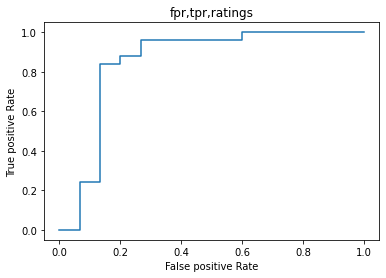

In [30]:
plt.plot(fpr,tpr)
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.title('fpr,tpr,ratings')

In [31]:
comperission_df=pd.DataFrame({'Actuals':y_test,'Predictions':pred})  #the function called comperission of the model
comperission_df

,Actuals,Predictions
82,1,1
15,0,0
111,1,1
177,1,1
76,0,0
163,1,1
68,1,1
67,1,1
120,1,1
173,1,1


In [32]:
roc_auc_score(y_test,pred)

0.78

In [33]:
precision_score(y_test,pred)


0.8

In [34]:
recall_score(y_test,pred)

0.96

In [35]:
f1_score(y_test,pred)

0.8727272727272728